<a id = '5.5'></a>
<p style = "font-size : 25px; color : #000080 ; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Welcome to the Flight Fare Prediction project repository! In this project, we aim to predict the fare of airline tickets based on various factors such as flight duration, days left for departure, arrival time, departure time, and more. We leverage the power of Artificial Intelligence (AI) and Machine Learning (ML) techniques to build predictive models that can effectively estimate the price of airline tickets.</p>

<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>1. Import All Required Libraries</strong></p>

In [ ]:

import numpy as np
import pandas as pd

#Library for Data Visualization.
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.2)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")


<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>2. Importing Dataset and Information about Data</strong></p>

In [ ]:
# Installing to openpyxl to read excel files of all versions:
!pip install openpyxl

In [ ]:
#importing data
df=pd.read_excel('/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>3. Basic Understanding of Data</strong></p>

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.shape

(10683, 11)

In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              6
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        6
Additional_Info    0
Price              0
dtype: int64


<a id = '5.5'></a>
<p style = "font-size : 25px; color : #000080 ; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>

<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>4. Handling Missing Values</strong></p>

In [ ]:
import numpy as np
import pandas as pd

# Generate a sample dataset (replace this with your actual dataset loading process)
np.random.seed(42)
data=df=pd.read_csv('/content/Data_Train.csv')
# Introduce some random missing values
missing_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[missing_indices, ['Route', 'Total_Stops']] = np.nan

# Find and print missing values
missing_data = df[df.isnull().any(axis=1)]
print("Missing Data:")
print(missing_data)

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Impute missing values using mean imputation
data_imputed = df.fillna(numeric_df.mean())

# Print the imputed dataset
print(data_imputed)


Missing Data:
          Airline Date_of_Journey   Source Destination Route Dep_Time  \
2483  Jet Airways      21/05/2019    Delhi      Cochin   NaN    22:50   
3544        GoAir       3/06/2019    Delhi      Cochin   NaN    10:35   
5032       IndiGo      24/05/2019  Chennai     Kolkata   NaN    14:45   
6076  Jet Airways      18/05/2019  Kolkata    Banglore   NaN    05:45   
7313  Jet Airways       1/05/2019  Kolkata    Banglore   NaN    14:05   
9039    Air India       6/05/2019    Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops              Additional_Info  Price  
2483  04:25 22 May   5h 35m         NaN  In-flight meal not included  12898  
3544         19:35       9h         NaN                      No info   4959  
5032         17:05   2h 20m         NaN                      No info   3858  
6076         18:15  12h 30m         NaN  In-flight meal not included  10844  
7313         19:50   5h 45m         NaN                      No info  14781  
9039  

In [ ]:
#finding the null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

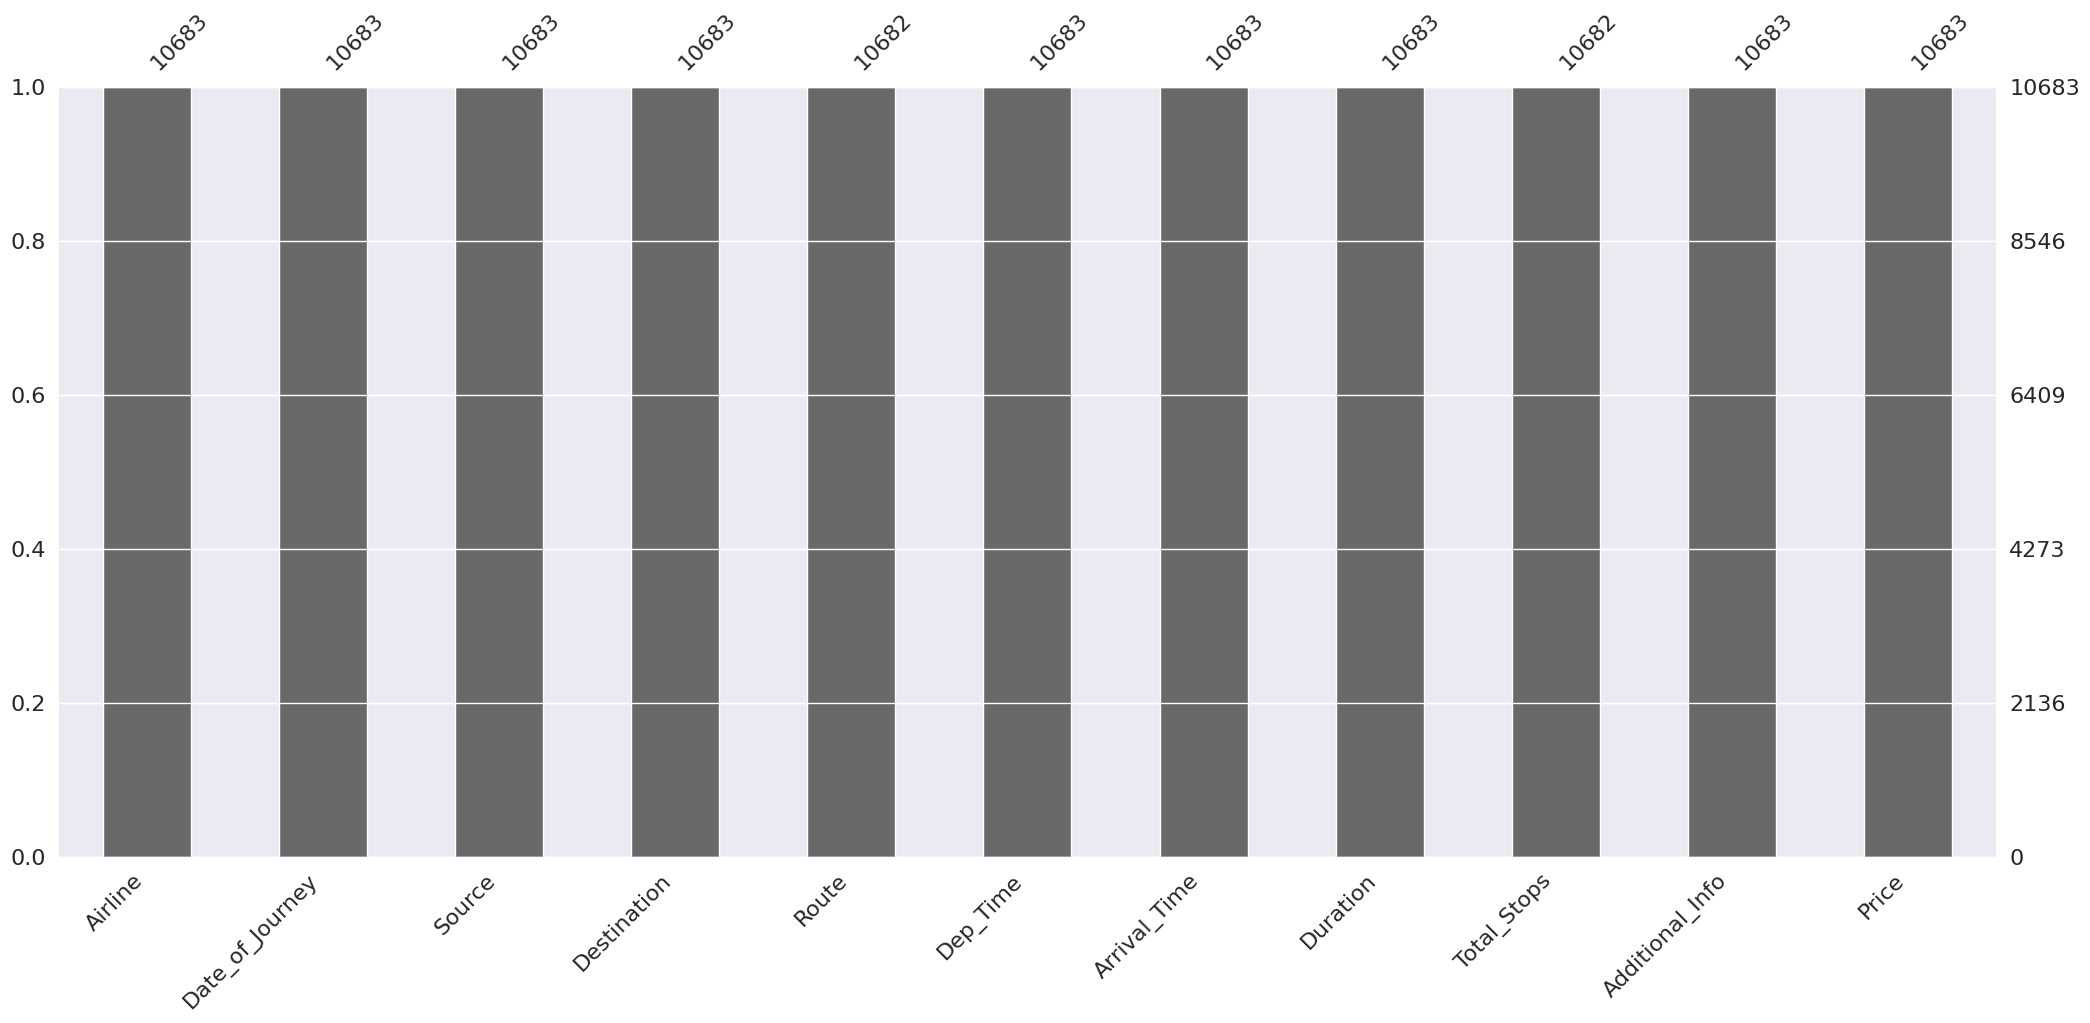

In [ ]:
#Visual representation of NULL values:
import missingno as msno
msno.bar(df)
plt.show

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#drop the nullvalues
# we will drop the nan values
df.dropna(inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* <a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">The NULL values are deleted/handlled.</p>

<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>5. Data Preprocessing</strong></p>

In [ ]:
#Check for datatypes of Columns
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">There are COLUMNS whose datatypes are not appropriate according its values. To ensure accurate predictions, we'll convert the data types of 'Date_of_journey', 'Arrival_Time', and 'Dep_Time' from object to date and time formats. This conversion will enable us to extract specific components such as day and month effectively:</p>


In [ ]:
#Create a function to change the datatype to its appropriate type:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [ ]:
#List of Columns:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
#Iterate through all the columns for changing thier dataypes using the above function:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [ ]:
#Check for datatypes of columns again:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">After extracting the day and month from the 'Date_of_Journey' column and storing them in two separate columns, the original 'Date_of_Journey' column becomes redundant and can be dropped.</p>


In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-26 05:50:00,2024-03-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-03-26 18:05:00,2024-03-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-03-26 16:50:00,2024-03-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
#Drop the Date_of_Journey column:
df.drop('Date_of_Journey', axis=1, inplace=True)

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">We'll extract the hour and minute information from both the 'Arrival_Time' and 'Dep_Time' features and create new columns for each. Once this information is extracted, the original 'Arrival_Time' and 'Dep_Time' columns can be dropped to maintain data clarity and reduce redundancy.</p>




In [ ]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
# call the function
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [ ]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')

#drop the column
drop_col(df,'Arrival_Time')

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i] # Adsds 0 hours

In [ ]:
#Store list values it into the original column:
df['Duration']=duration

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
#Extract Hour and Minutes from the Duration Column:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [ ]:
#Apply those Functions on the Duration Column:
df['dur_hour']=df['Duration'].apply(hour)

In [ ]:
df['dur_min']=df['Duration'].apply(minutes)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
#This is the Column which we created above. Drop the Duration Column.
drop_col(df,'Duration')

In [ ]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">All columns have been appropriately assigned their respective data types, except for 'dur_hour' and 'dur_min'. To ensure consistency and compatibility with the dataset, we'll proceed by typecasting these columns accordingly.</p>

In [ ]:
#Typecast the Columns:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int64
dur_min               int64
dtype: object

<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>5. Handling Categorical Columns</strong></p>

In [ ]:
#Check for Object Datatype (Categorical Columns) and store it in a seperate list for easy processing:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
# Seperate the continuous columns into seperate list:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">We employ two primary encoding techniques to convert categorical data into numerical formats:</p>

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">For nominal data, which lacks any inherent order, we utilize one-hot encoding.</p>
* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">On the other hand, for ordinal data that possess a defined order, we opt for label encoding.</p>

In [ ]:
#Create a DataFrame Called Categirical with only Categorical Columns:
categorical = df[column]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>5.1 Handle Airline Column:</strong></p>

In [ ]:
#Check for Unique Catergories in the Airline Column:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>5.2 Handle Source Column:</strong></p>

In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>5.3 Handle Destination Column:</strong></p>

In [ ]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
#Merge All the Sub-datasets we created for cleaning the columns into one final dataframe:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>Outliers Detection (If Any)</strong></p>

In [ ]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

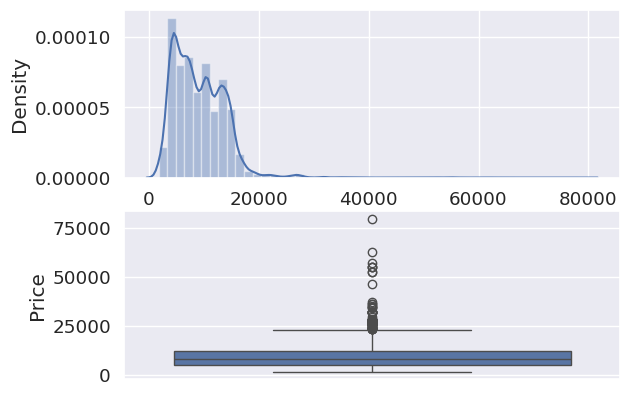

In [ ]:
plot(final_df,'Price')

<strong><p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Replacing Outliers with Median:</p></strong>

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">To address outliers in the price feature, we opt for replacing them with the median value. This strategy ensures robustness in data preprocessing, maintaining model stability and accuracy.</p>

In [ ]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

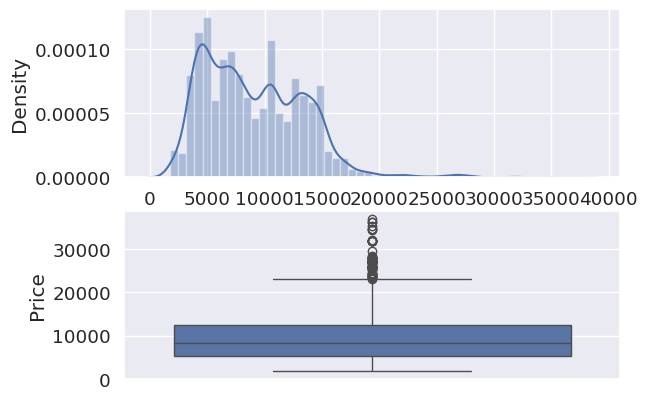

In [ ]:
plot(final_df,'Price')

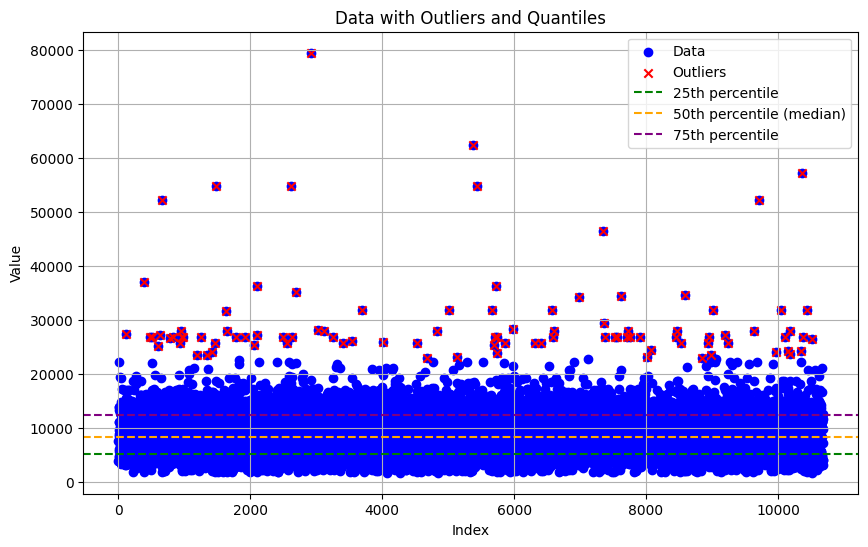

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_z_score(data, threshold=3):
    """
    Detect outliers using Z-score method.

    Parameters:
    - data: Input data (pandas Series or numpy array).
    - threshold: Z-score threshold for outlier detection (default is 3).

    Returns:
    - List of outlier indices.
    """
    outliers = []
    mean = np.mean(data)
    std_dev = np.std(data)

    for i, value in enumerate(data):
        z_score = (value - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

# Read the CSV file

data = pd.read_csv('/content/Data_Train.csv')

# Extract the column containing numerical data
# You might need to replace 'column_name' with the actual column name containing the data
data_column = data['Price']

# Detect outliers using Z-score
outliers_indices = detect_outliers_z_score(data_column)

# Calculate quantiles
quantiles = np.quantile(data_column, [0.25, 0.5, 0.75])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_column.index, data_column, label='Data', color='blue')
plt.scatter(outliers_indices, data_column.iloc[outliers_indices], label='Outliers', color='red', marker='x')
plt.axhline(quantiles[0], color='green', linestyle='--', label='25th percentile')
plt.axhline(quantiles[1], color='orange', linestyle='--', label='50th percentile (median)')
plt.axhline(quantiles[2], color='purple', linestyle='--', label='75th percentile')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data with Outliers and Quantiles')
plt.legend()
plt.grid(True)
plt.show()

<a id = '5.5'></a>
<p style = "font-size : 22px; color : #000080 ; font-family : 'Comic Sans MS'; border-radius: 5px 5px;"><strong>8. Feature Selection</strong></p>

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Finding out the best feature which will contribute and have good relationships with the target variable. Following are some of the feature selection methods.
1)Correlation
.</p>



<Axes: >

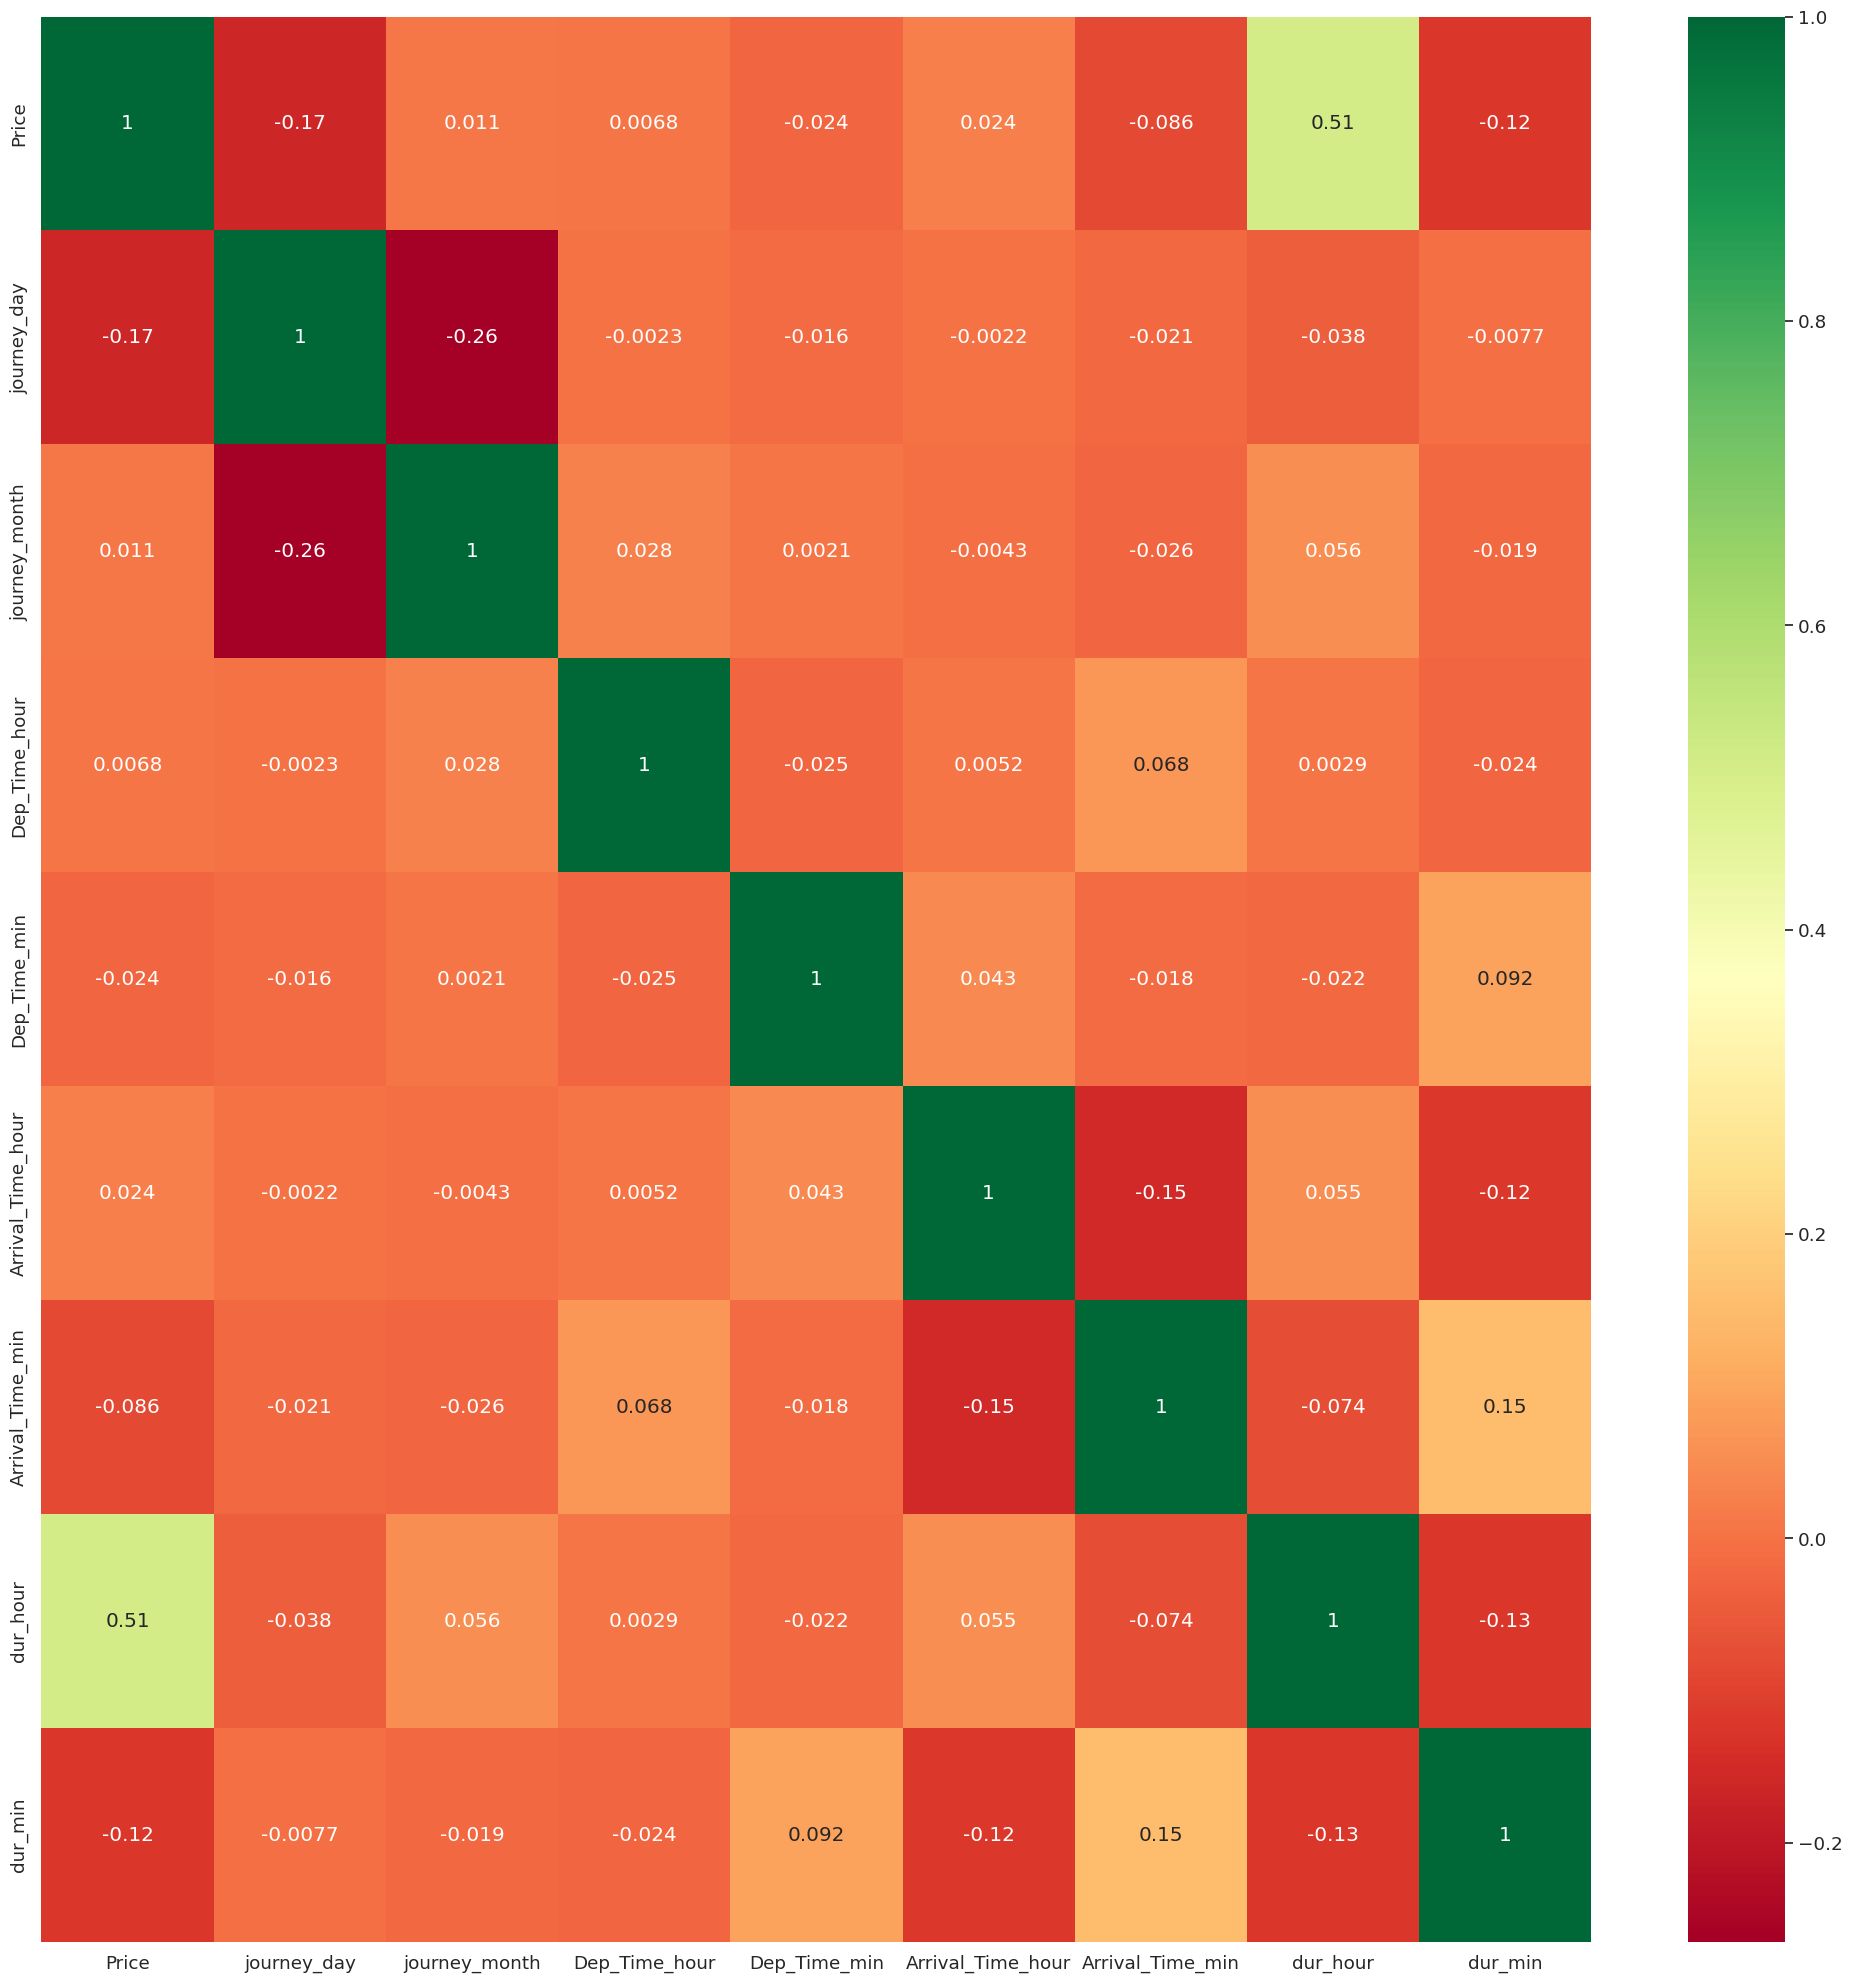

In [ ]:
# Heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Read the dataset
df = pd.read_csv('/content/Data_Train.csv')

# Assuming your features are in columns other than the target column
X = df[['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']]  # Features
y = df['Price']  # Target variable, replace 'Price' with your actual target column name

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features based on F-value
X_selected = selector.fit_transform(X_encoded, y)

# Get indices of selected features
selected_feature_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_feature_indices)

# Get names of selected features
selected_feature_names = X_encoded.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)


Selected feature indices: [2134 2135 2136 2139 2142]
Selected feature names: Index(['Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_No Info',
       'Additional_Info_Red-eye flight'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Data Visualization
1)BOX PLOT

AIRLINE VS PRICE

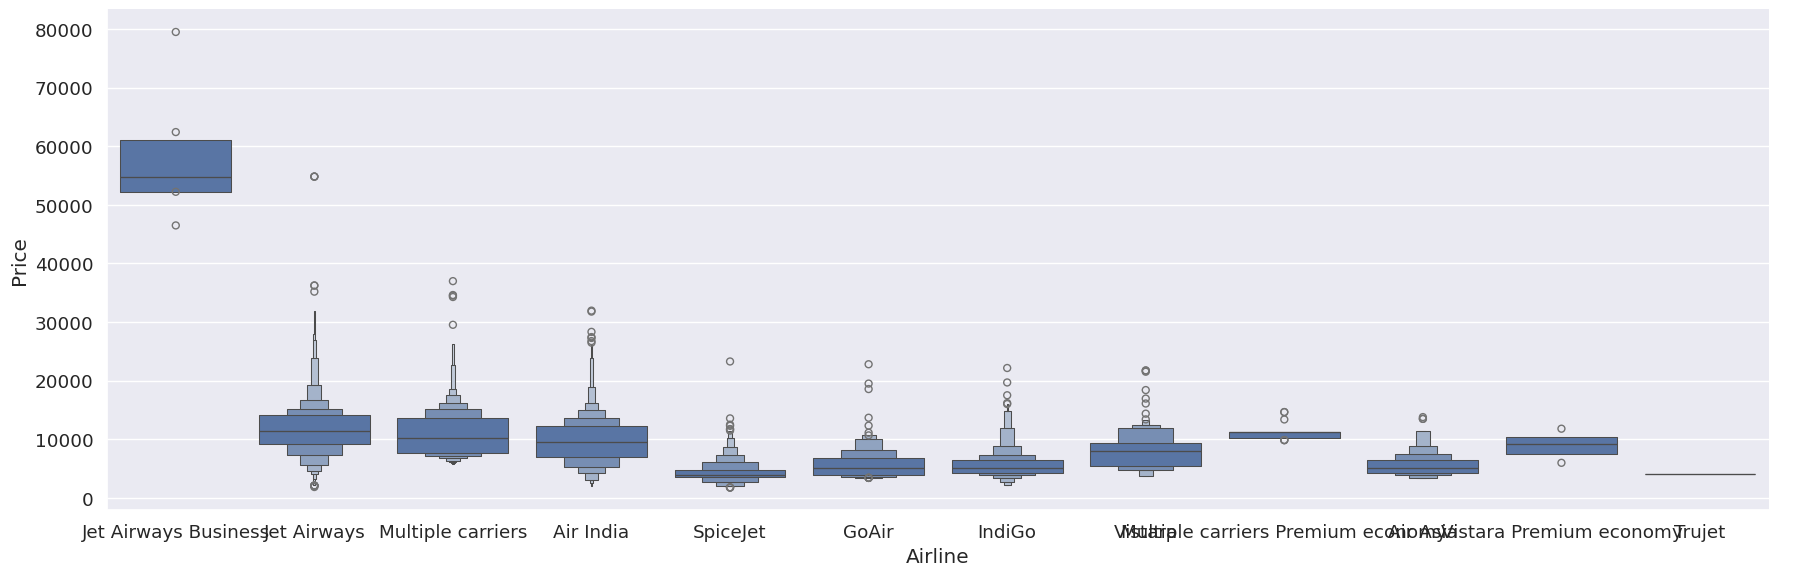

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


From the Above we can see that Jet Airways Business has premium flight fares as compared to other Airlines



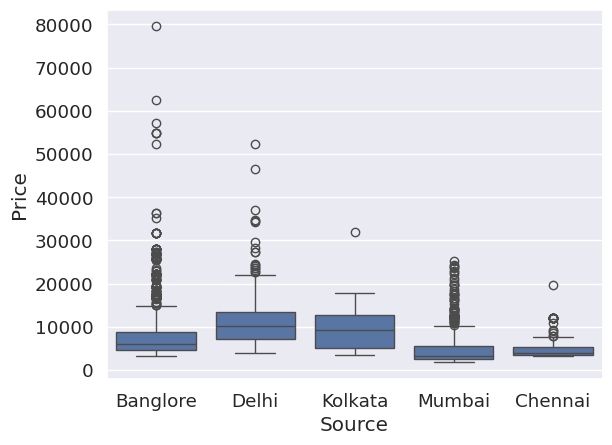

In [ ]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

From the Above we can see that Flights Originating From Banglore has high flight fares as compared to other sources from where flights are originating

Analysis of Airline
BARPLOT


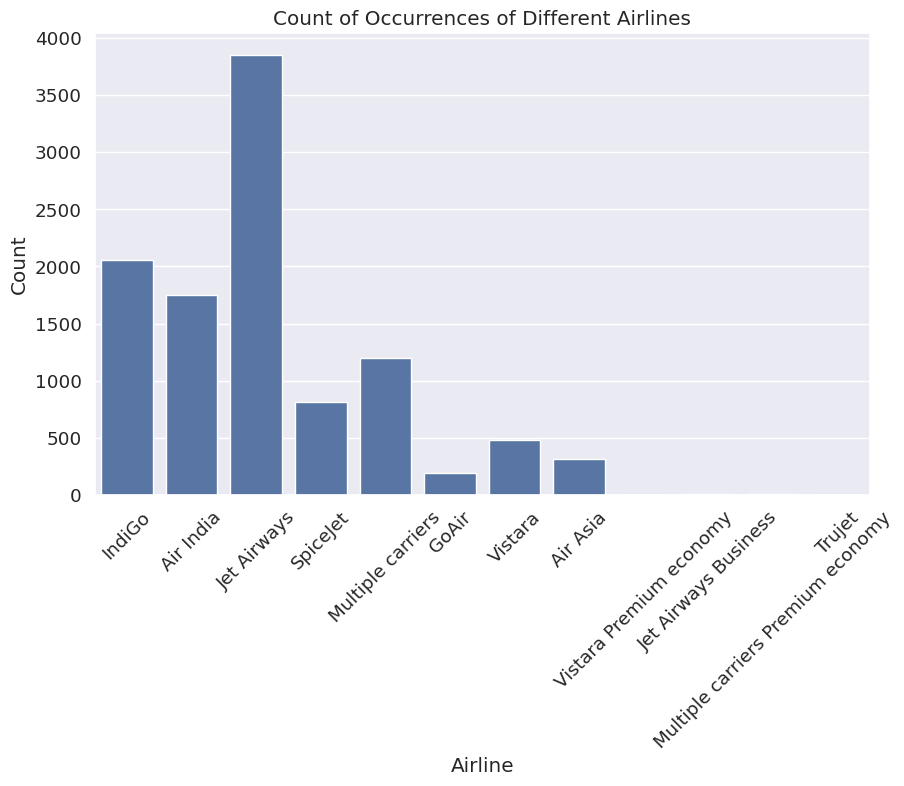

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Airline')
plt.title('Count of Occurrences of Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Plotting Ticket Prices vs Airlines



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

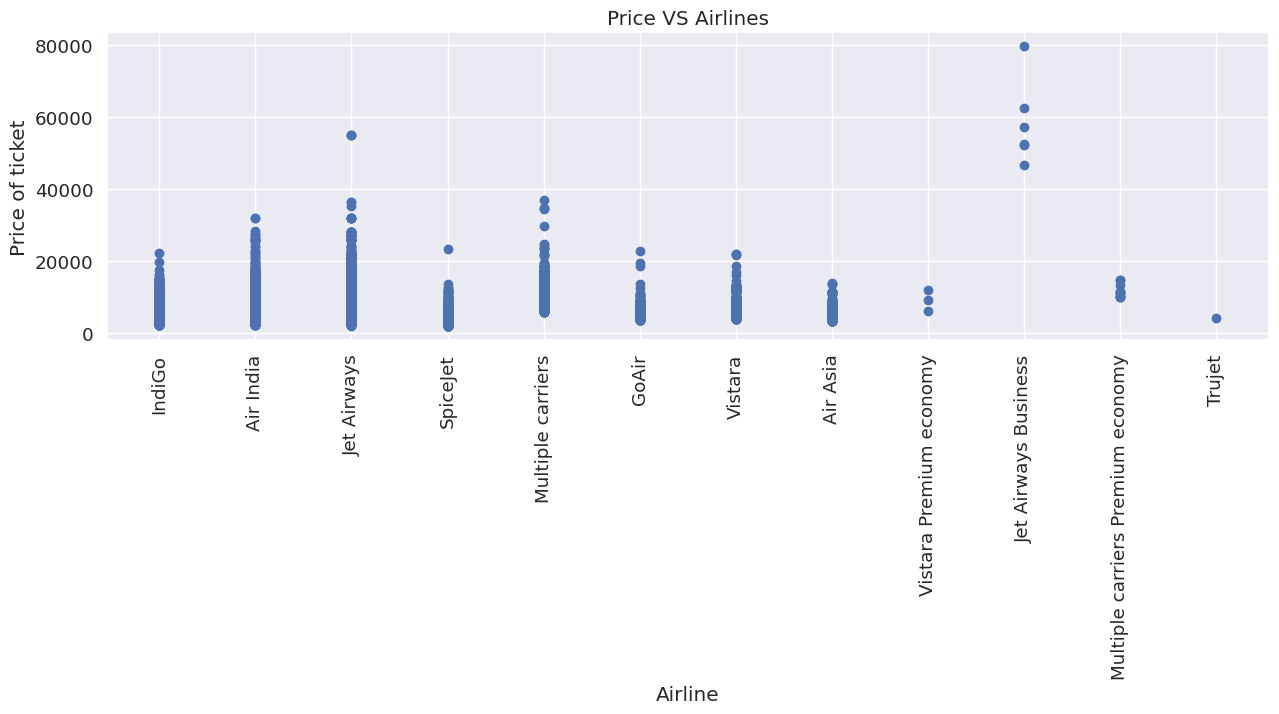

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'],df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

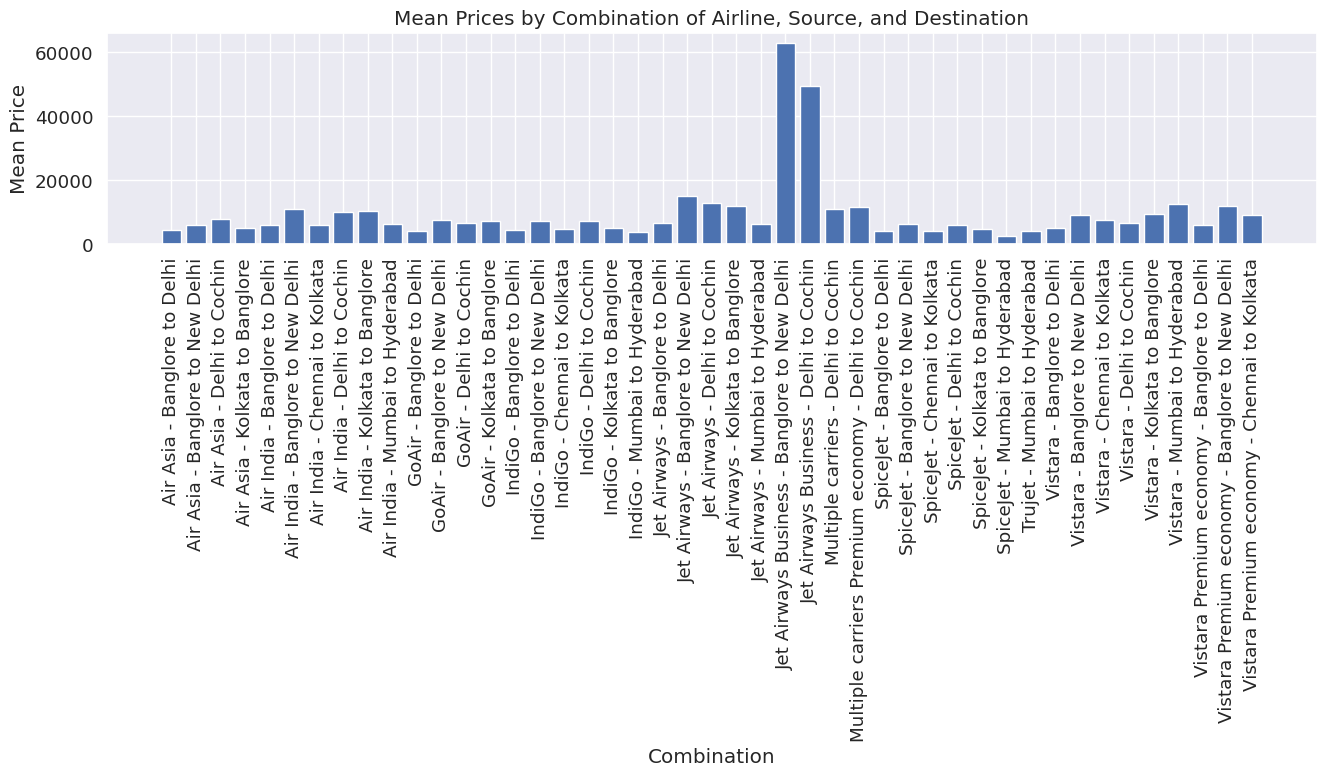

In [ ]:
mean_prices = df.groupby(['Airline', 'Source', 'Destination'], as_index=False)['Price'].mean()

# Create a bar plot
plt.figure(figsize=(13.5, 8))
plt.bar(mean_prices.index, mean_prices['Price'])
plt.xlabel('Combination')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Combination of Airline, Source, and Destination')
plt.xticks(mean_prices.index, [f'{row["Airline"]} - {row["Source"]} to {row["Destination"]}' for _, row in mean_prices.iterrows()], rotation=90)
plt.tight_layout()
plt.show()


Jet Airways - Delhi to Cochin & Vistara - Mumbai to Hyderabad flight has the highest average price.


**TEST DATA**

In [ ]:
test_data= pd.read_excel("/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
# Preprocessing


print(test_data.info())


test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)




print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)




print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

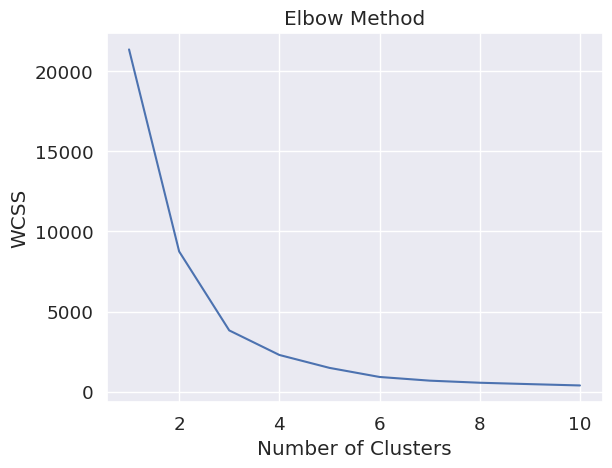

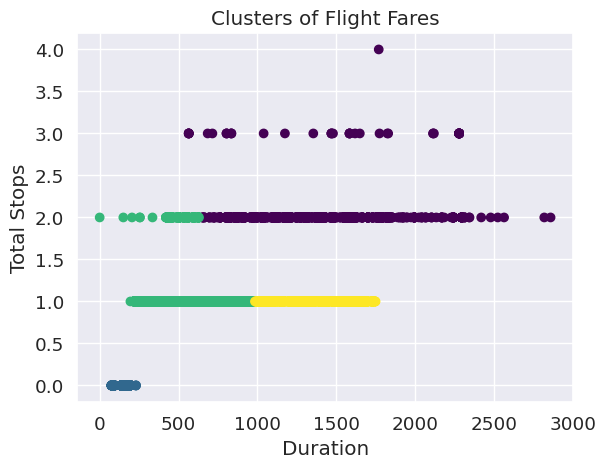

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import imputer
import matplotlib.pyplot as plt

# Load the dataset
flight_data = pd.read_excel('/Data_Train.xlsx')

# Preprocess 'Duration' column to extract numerical information
def extract_minutes(duration):
    parts = duration.split()
    if len(parts) == 2:
        hours = int(parts[0].replace('h', ''))
        minutes = int(parts[1].replace('m', ''))
        return hours * 60 + minutes
    elif len(parts) == 1 and 'h' in parts[0]:
        hours = int(parts[0].replace('h', ''))
        return hours * 60
    else:
        return 0  # or any other default value you choose if duration format is not as expected

flight_data['Duration'] = flight_data['Duration'].apply(extract_minutes)

# Convert 'Total_Stops' column to numeric format
flight_data['Total_Stops'] = flight_data['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Select relevant features for clustering
X = flight_data[['Duration', 'Total_Stops']]

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow curve, select the optimal number of clusters and fit the K-means model
k = 4  # Assume 4 clusters based on the elbow curve
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
flight_data['Cluster'] = clusters

# Analyze the clusters (e.g., calculate cluster means)
cluster_analysis = flight_data.groupby('Cluster').mean()

# Visualize the clusters (e.g., scatter plot of two features)
plt.scatter(flight_data['Duration'], flight_data['Total_Stops'], c=flight_data['Cluster'], cmap='viridis')
plt.title('Clusters of Flight Fares')
plt.xlabel('Duration')
plt.ylabel('Total Stops')
plt.show()
